In [3]:
%autosave 0

Autosave disabled


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Grouping and generating to Graph using 

In [2]:
df_graph = pd.DataFrame({
    'regiment': ['Nighthawks', 'Nighthawks', 'Nighthawks', 'Nighthawks', 'Dragoons', 'Dragoons', 'Dragoons', 'Dragoons', 'Scouts', 'Scouts', 'Scouts', 'Scouts'],
    'bucket': ['0', '1', '0', '0', '1', '1', '0', '0','0', '1', '2', '2'],
    'name': ['Miller', 'Jacobson', 'Ali', 'Milner', 'Cooze', 'Jacon', 'Ryaner', 'Sone', 'Sloan', 'Piger', 'Riani', 'Ali'],
    'clicks': [4, 24, 31, 2, 3, 4, 24, 31, 2, 3, 2, 3],
    'impressions': [25, 94, 57, 62, 70, 25, 94, 57, 62, 70, 62, 70]
})
df_graph

,regiment,bucket,name,clicks,impressions
0,Nighthawks,0,Miller,4,25
1,Nighthawks,1,Jacobson,24,94
2,Nighthawks,0,Ali,31,57
3,Nighthawks,0,Milner,2,62
4,Dragoons,1,Cooze,3,70
5,Dragoons,1,Jacon,4,25
6,Dragoons,0,Ryaner,24,94
7,Dragoons,0,Sone,31,57
8,Scouts,0,Sloan,2,62
9,Scouts,1,Piger,3,70


In [3]:
groupbyregimentbucket = df_graph.groupby(['regiment', 'bucket'])
print('[Grouping by regiment and bucket, and aggregating #of clicks]')
print(groupbyregimentbucket['clicks'].aggregate(np.sum))

[Grouping by regiment and bucket, and aggregating #of clicks]
regiment    bucket
Dragoons    0         55
            1          7
Nighthawks  0         37
            1         24
Scouts      0          2
            1          3
            2          5
Name: clicks, dtype: int64


In [4]:
print('[unstacking]')
regimentbucketclicksum = groupbyregimentbucket['clicks'].aggregate(np.sum).unstack()
print(regimentbucketclicksum)

[unstacking]
bucket         0     1    2
regiment                   
Dragoons    55.0   7.0  NaN
Nighthawks  37.0  24.0  NaN
Scouts       2.0   3.0  5.0


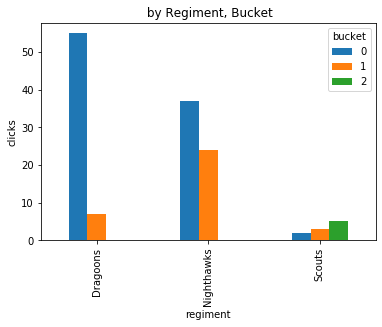

In [5]:
regimentbucketclicksum.plot(kind = 'bar', title = ' by Regiment, Bucket')
plt.ylabel('clicks')
plt.show()

## Grouping by title and find matched value

- this test example used in order to extract agreement level for spir. data as below:

Spir..-model/jupyter-notebook/Spir..-agreement.ipynb#Extract-Agreement

In [6]:
def grouping_fnc(x):
    result = [i for i in x['category_1']]
    result = list(set(result))
    return 1 if len(result) > 1 else 0

In [7]:
df_grouping = pd.DataFrame({
    'category_1': [1, 1, 2, 2, 3, 2, 4, 4],
    'category_2': ['100000009', '100000009', '100000009', '100000009', '100000009','100000034','100000034', '100000034'],
    'number': [12, 13, 12, 13, 12, 11, 12, 13],
    'title': ['red', 'red', 'green','green','red1','red1','red2','red2']
})
result = df_grouping.groupby('title', group_keys=False).apply(grouping_fnc)
result

title
green    0
red      0
red1     1
red2     0
dtype: int64